In [8]:
!pip install tensorflow
!pip install keras

In [9]:
from tensorflow import keras
import numpy as np
from functions import build_model
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

In [10]:
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [11]:
row_size = X_train_full[0].shape[0]
col_size = X_train_full[0].shape[1]

In [12]:
X_train_full = X_train_full.reshape(X_train_full.shape[0],row_size, col_size,1)
X_test = X_test.reshape(X_test.shape[0],row_size, col_size,1)
#y_train_full.reshape(X_train_full.shape[0],row_size, col_size,1)

In [13]:
#dividindo por 255 para escalar os pixels entre 0 e 1
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] /255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

## Arquitetura

Uma arquitetura comum para CNN's é: pilha de convolutional layers, seguida por uma ReLU layer, pooling layer, e mais algumas convolutional layers (seguido por ReLU). Uma rede convolucional pode ser definida abaixo:

In [16]:
n_filters = [16, 32, 64]
learning_rate = [0.001, 0.01, 0.05]

best_sz, best_lr = 0, 0
best_acc = 0

for sz in n_filters:
    for lr in learning_rate:
        model = build_model(lr, sz)
        model.fit(X_train, y_train, epochs=20)
        y_pred = np.argmax(model.predict(X_valid), axis=-1)
        accuracy = accuracy_score(y_valid, y_pred)
        

        if accuracy > best_acc:
            best_acc = accuracy
            best_sz, best_lr = sz, lr

Epoch 1/20
1719/1719 [==============================] - 5s 3ms/step - loss: 2.2996 - accuracy: 0.1115
Epoch 2/20
1719/1719 [==============================] - 5s 3ms/step - loss: 2.2704 - accuracy: 0.1658
Epoch 3/20
1719/1719 [==============================] - 5s 3ms/step - loss: 2.1798 - accuracy: 0.2277
Epoch 4/20
1719/1719 [==============================] - 5s 3ms/step - loss: 1.9588 - accuracy: 0.3090
Epoch 5/20
1719/1719 [==============================] - 5s 3ms/step - loss: 1.7121 - accuracy: 0.4004
Epoch 6/20
1719/1719 [==============================] - 5s 3ms/step - loss: 1.5257 - accuracy: 0.4587
Epoch 7/20
1719/1719 [==============================] - 5s 3ms/step - loss: 1.3833 - accuracy: 0.5066
Epoch 8/20
1719/1719 [==============================] - 5s 3ms/step - loss: 1.2735 - accuracy: 0.5501
Epoch 9/20
1719/1719 [==============================] - 5s 3ms/step - loss: 1.1910 - accuracy: 0.5839
Epoch 10/20
1719/1719 [==============================] - 5s 3ms/step - loss: 1.126

* A primeira layer usa 64 filtros, cada um 7x7, com função de ativação ReLU, padding same, e o shape do input (imagens 28x28, com um canal de cor)
* Pooling layer que divide as dimensões por 2
* Depois, a repetição de duas layers convolucionais seguidas de uma pooling layer. Para imagens maiores, isso poderia ser repetido mais vezes. O número de repetições é um hiperparametro.
* Por fim, duas hidden dense layers e uma output layer, além das dropout layers para reduzir overfitting.

Obs:
- o número de filtros das layers convolucionais aumenta a medida que crescemos a CNN, isso tem a ver com o número de combinações que podemos fazer com cada imagem de baixo nível
- padding 'same' que significa que a rede convolucional utiliza zero padding se necessário (adicionaria zeros ao dataset caso a output layer seja menor que a input layer, por causa do stride). O padding poderia ser 'valid', que nessa situação ao invés de adicionar zero, ignoraria algumas colunas e linhas da input layer

In [19]:
print(best_sz, best_lr)
final_model = build_model(best_lr, best_sz)

64 0.05


In [20]:
final_model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 28, 28, 64)        3200      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dense_39 (Dense)             (None, 128)             

In [21]:
from keras.optimizers import SGD
custom_optimizer = SGD(lr = 0.05)
final_model.compile(loss="sparse_categorical_crossentropy", optimizer=custom_optimizer, metrics=["accuracy"])

In [22]:
history = final_model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.9341 - accuracy: 0.6806 - val_loss: 0.0723 - val_accuracy: 0.9804
Epoch 2/20
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1435 - accuracy: 0.9637 - val_loss: 0.0563 - val_accuracy: 0.9848
Epoch 3/20
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0962 - accuracy: 0.9751 - val_loss: 0.0463 - val_accuracy: 0.9878
Epoch 4/20
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0747 - accuracy: 0.9805 - val_loss: 0.0433 - val_accuracy: 0.9900
Epoch 5/20
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0642 - accuracy: 0.9820 - val_loss: 0.0426 - val_accuracy: 0.9902
Epoch 6/20
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0489 - accuracy: 0.9867 - val_loss: 0.0425 - val_accuracy: 0.9908
Epoch 7/20
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0464 - accuracy: 0.9870 - val_loss: 0.0413 - val_accuracy:

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

df_losses = pd.DataFrame(history.history)
df_losses

,loss,accuracy,val_loss,val_accuracy
0,0.460302,0.854073,0.072278,0.9804
1,0.127622,0.966364,0.056260,0.9848
2,0.091811,0.975764,0.046271,0.9878
3,0.070731,0.981218,0.043270,0.9900
4,0.060466,0.983691,0.042586,0.9902
5,0.052776,0.986436,0.042473,0.9908
6,0.046860,0.987273,0.041261,0.9900
7,0.039955,0.989400,0.038869,0.9914
8,0.035354,0.990382,0.036200,0.9922
9,0.033846,0.991309,0.031627,0.9930


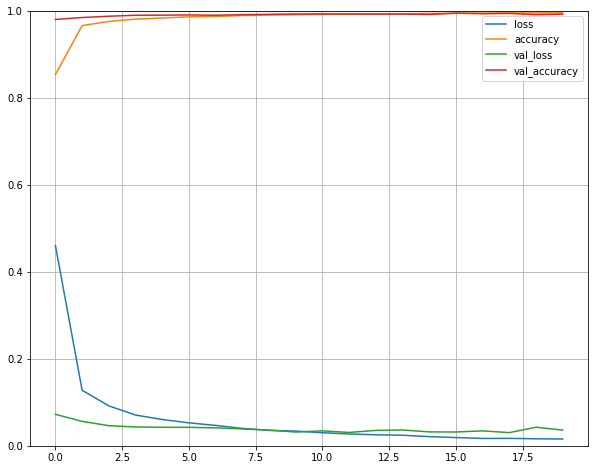

In [24]:
df_losses.plot(figsize=(10,8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

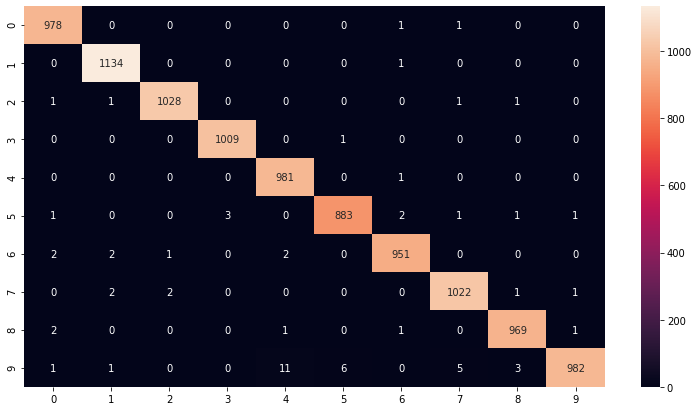

In [25]:
y_pred = np.argmax(model.predict(X_test), axis=-1)

#traditional confusion matrix
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred))

plt.figure(figsize = (13,7))
sns.heatmap(df_cm, annot=True, fmt='d')

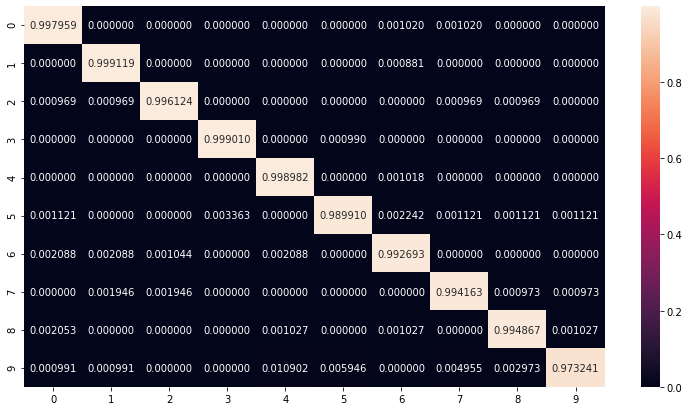

In [26]:
#confusion matrix in accuracy format for each class
cm = confusion_matrix(y_test, y_pred)

df_cm_acc = pd.DataFrame(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis])

plt.figure(figsize = (13,7))
sns.heatmap(df_cm_acc, annot=True, fmt='f')